# Jupyter notebook of the mouse-fly gut comparison using scGOclust

© EMBL-European Bioinformatics Institute, 2025

Yuyao Song <ysong@ebi.ac.uk>

Updated on Mar 2025

In [8]:
library(SeuratDisk)
library(scGOclust)
library(Seurat)
library(tidyverse)

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [9]:
options(repr.plot.width = 12, repr.plot.height = 10)

In [1]:
# here I am loading precomputed GO objects, with the computation detailed in the scripts in "create_go_obj"
# examples of creating GO objects using ENSEMBL annotations can be found in the kidney analysis notebook

In [3]:
mmu_obj <- LoadH5Seurat("mmu_gut_go_obj_no_IEA.h5seurat")
dme_obj <- LoadH5Seurat("dme_gut_go_obj_no_IEA.h5seurat")

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding miscellaneous information for RNA

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding miscellaneous information for RNA

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [4]:
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [2]:
## analyse shared GO BP features - subset the two objects to only contain shared GO BP terms

In [5]:
dme_obj = dme_obj[which(rownames(dme_obj$RNA) %in% rownames(mmu_obj$RNA)), ]

In [6]:
dme_obj

An object of class Seurat 
4113 features across 9641 samples within 1 assay 
Active assay: RNA (4113 features, 0 variable features)
 2 layers present: counts, data

In [7]:
mmu_obj = mmu_obj[which(rownames(mmu_obj$RNA) %in% rownames(dme_obj)), ]

In [8]:
mmu_obj


An object of class Seurat 
4113 features across 19962 samples within 1 assay 
Active assay: RNA (4113 features, 0 variable features)
 2 layers present: counts, data

In [9]:

# remove blood cells because no blood cell in fly data
mmu_obj <- mmu_obj[, !(mmu_obj@meta.data$cell_type_annotation %in% c('intestine_B cell', 'intestine_Dendritic cell', 
                                                                'intestine_Erythroid cell', 
                                                                'intestine_Macrophage',
                                                                'intestine_Mast cell',
                                                                'intestine_Plasmacytoid dendritic cell',
                                                                'intestine_T cell', 
                                                                'stomach_Dendritic cell',
                                                                'stomach_Macrophage'
                                                               ))]

In [11]:
Idents(mmu_obj) <- mmu_obj@meta.data$cell_type_annotation

In [12]:
levels(factor(Idents(mmu_obj)))

[1] "intestine_Enterocyte"                 
 [2] "intestine_Enteroendocrine cell"       
 [3] "intestine_Epithelial cell"            
 [4] "intestine_Fibroblast"                 
 [5] "intestine_Goblet cell"                
 [6] "intestine_Paneth cell"                
 [7] "intestine_Tuft cell"                  
 [8] "stomach_Chief cell"                   
 [9] "stomach_Endocrine cell"               
[10] "stomach_Endothelial cell"             
[11] "stomach_Epithelial cell"              
[12] "stomach_Fibroblast"                   
[13] "stomach_Parietal cell"                
[14] "stomach_Pit cell"                     
[15] "stomach_Proliferating epithelial cell"
[16] "stomach_Smooth muscle cell"           
[17] "stomach_Squamous epithelium"          
[18] "stomach_Tuft cell"

In [4]:
## function for running seurat clustering on the scGOclust object
## check that the different cell types are still well-represented and stay clear under GO features
## the gut case is more tricky because different epithelial cell types are highly similar in functions

In [13]:
mmu_obj <- analyzeGOSeurat(mmu_obj, cell_type_col = 'cell_type_annotation', cluster_res = 0.9)

perform normalization and log1p for mmu_obj

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15854
Number of edges: 681116

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8636
Number of communities: 21
Elapsed time: 2 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
20:32:07 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

20:32:07 Read 15854 rows and found 50 numeric columns

20:32:07 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

20:32:07 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:32:09 Writing NN index file to 

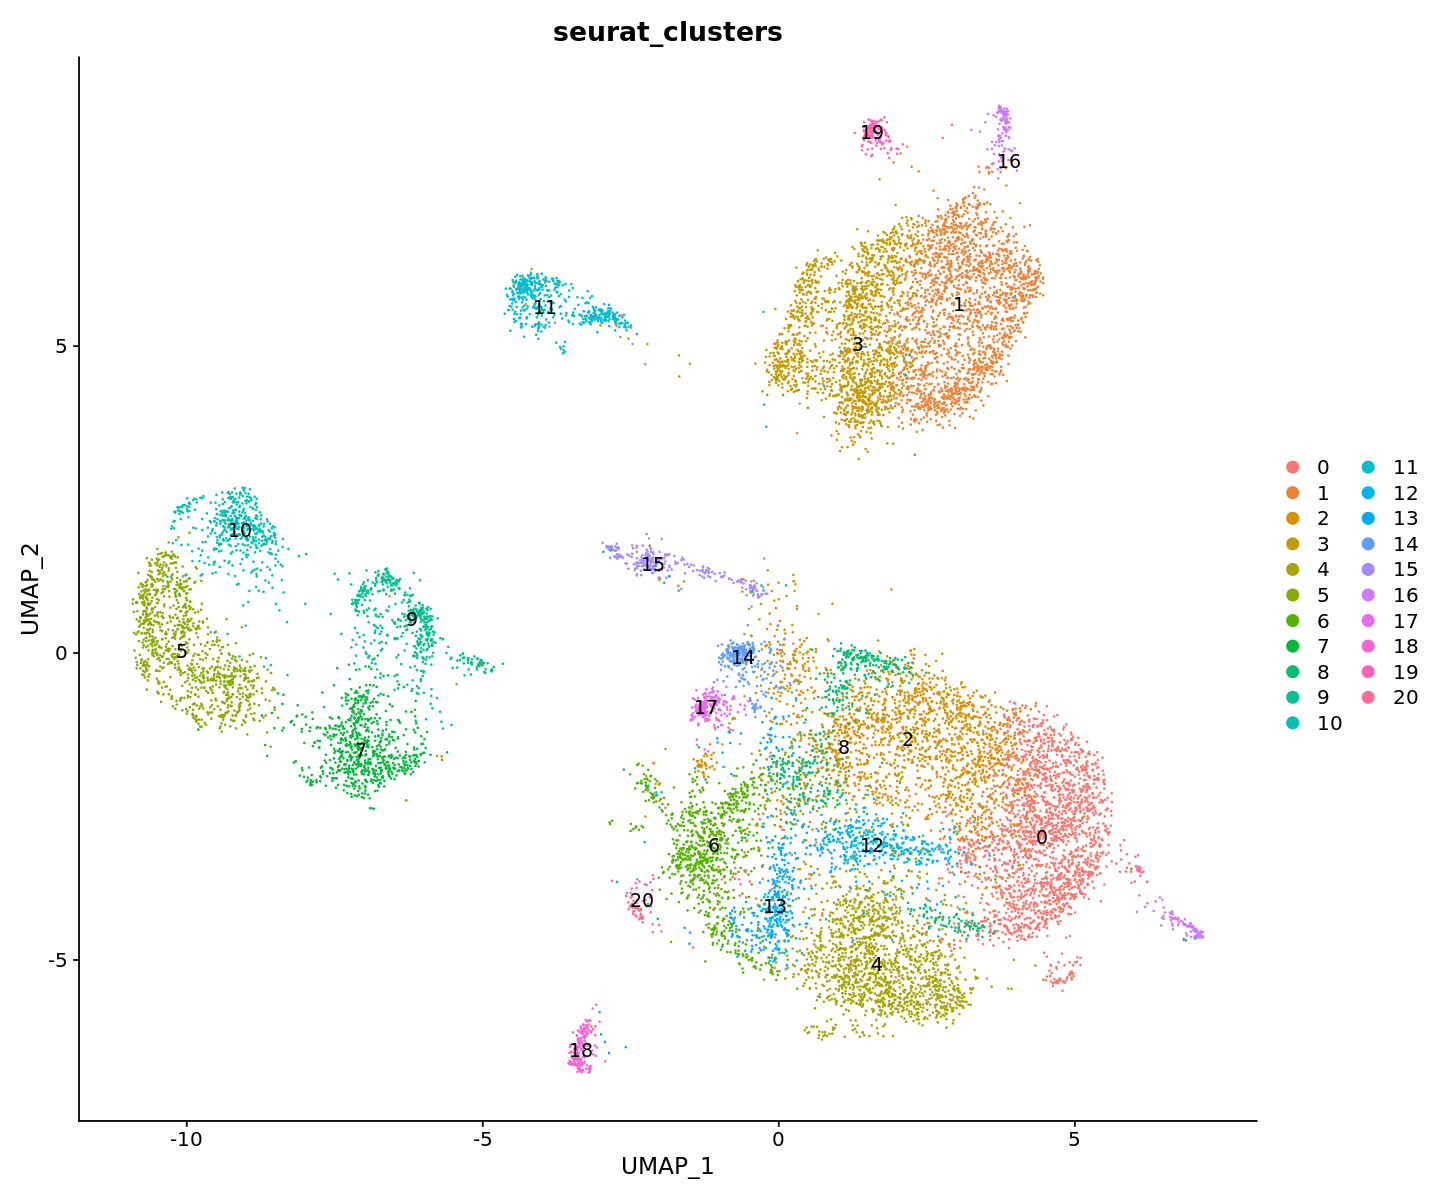

In [14]:

DimPlot(mmu_obj, label = TRUE, group.by = 'seurat_clusters')

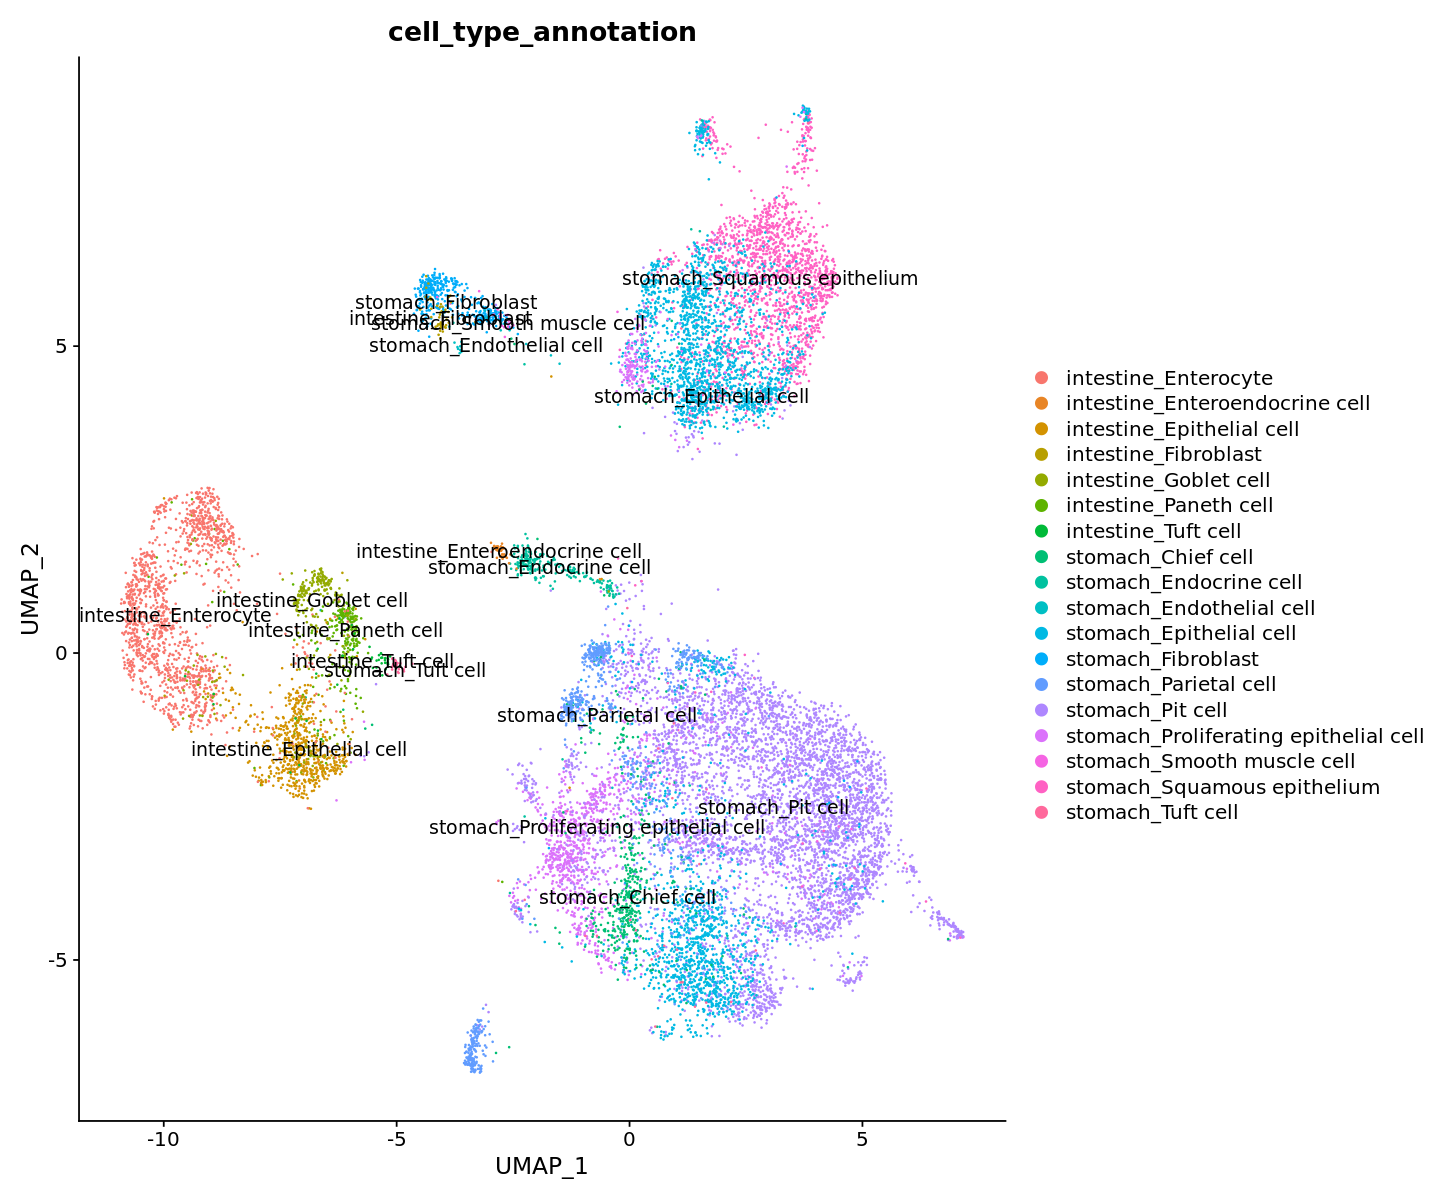

In [15]:
DimPlot(mmu_obj, label = TRUE, group.by = 'cell_type_annotation')

In [16]:
mmu_obj_epi <- subset(mmu_obj, idents = c("stomach_Chief cell", 'stomach_Epithelial cell', 'stomach_Parietal cell', 'stomach_Pit cell'))
mmu_obj_epi <- FindNeighbors(mmu_obj_epi)
mmu_obj_epi <- FindClusters(mmu_obj_epi, resolution=0.1)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9328
Number of edges: 302951

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9484
Number of communities: 5
Elapsed time: 1 seconds


In [17]:
mmu_obj_epi@meta.data  %>% filter(RNA_snn_res.0.9 %in% c("4")) %>% group_by(RNA_snn_res.0.1) %>% count()

RNA_snn_res.0.1 n   
1 0                 97
2 1               1392
3 3                  1

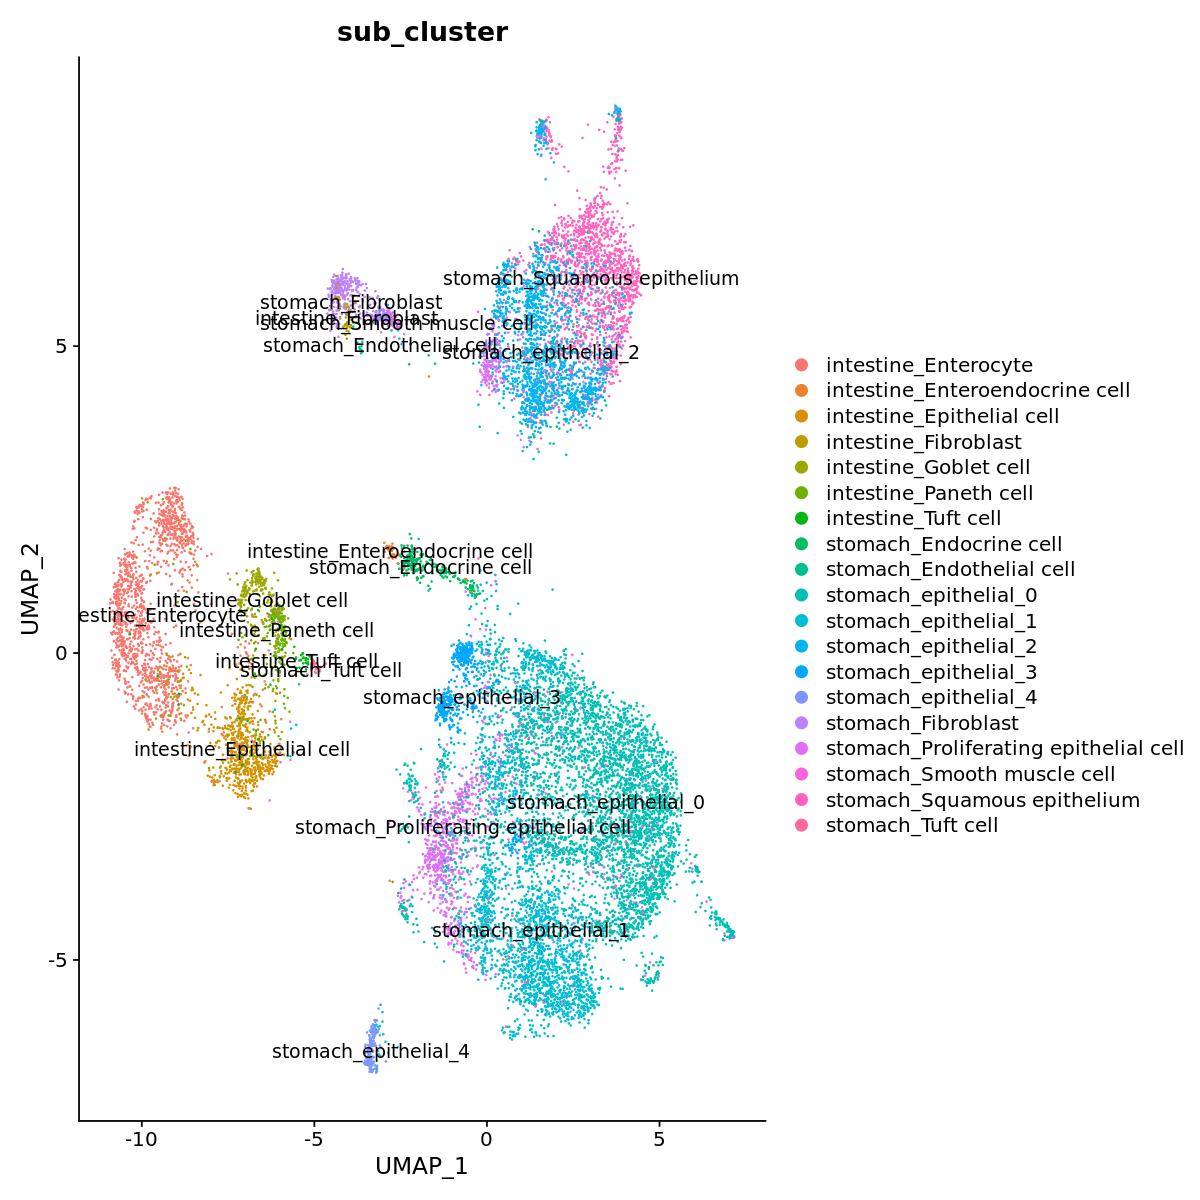

In [18]:
options(repr.plot.width = 10)
# Subclustering mouse epithelial cell types
# Generate a new column called sub_cluster in the metadata
mmu_obj$sub_cluster <- as.character(Idents(mmu_obj))
# Change the information of cells containing sub-cluster information
mmu_obj$sub_cluster[Cells(mmu_obj_epi)] <- paste("stomach_epithelial_",Idents(mmu_obj_epi), sep="")
DimPlot(mmu_obj, group.by = "sub_cluster", label=TRUE)

In [19]:
dme_obj <- analyzeGOSeurat(dme_obj, cell_type_col = 'annotation', cluster_res = 0.6)

perform normalization and log1p for dme_obj

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9641
Number of edges: 446442

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9292
Number of communities: 18
Elapsed time: 0 seconds


20:33:11 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

20:33:11 Read 9641 rows and found 50 numeric columns

20:33:11 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

20:33:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:33:12 Writing NN index file to temp file /tmp/RtmpODh60X/file2e2d64155ead8f

20:33:12 Searching Annoy index using 1 thread, search_k = 3000

20:33:15 Annoy recall = 100%

20:33:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:33:17 Initializing from normalized Laplacian +

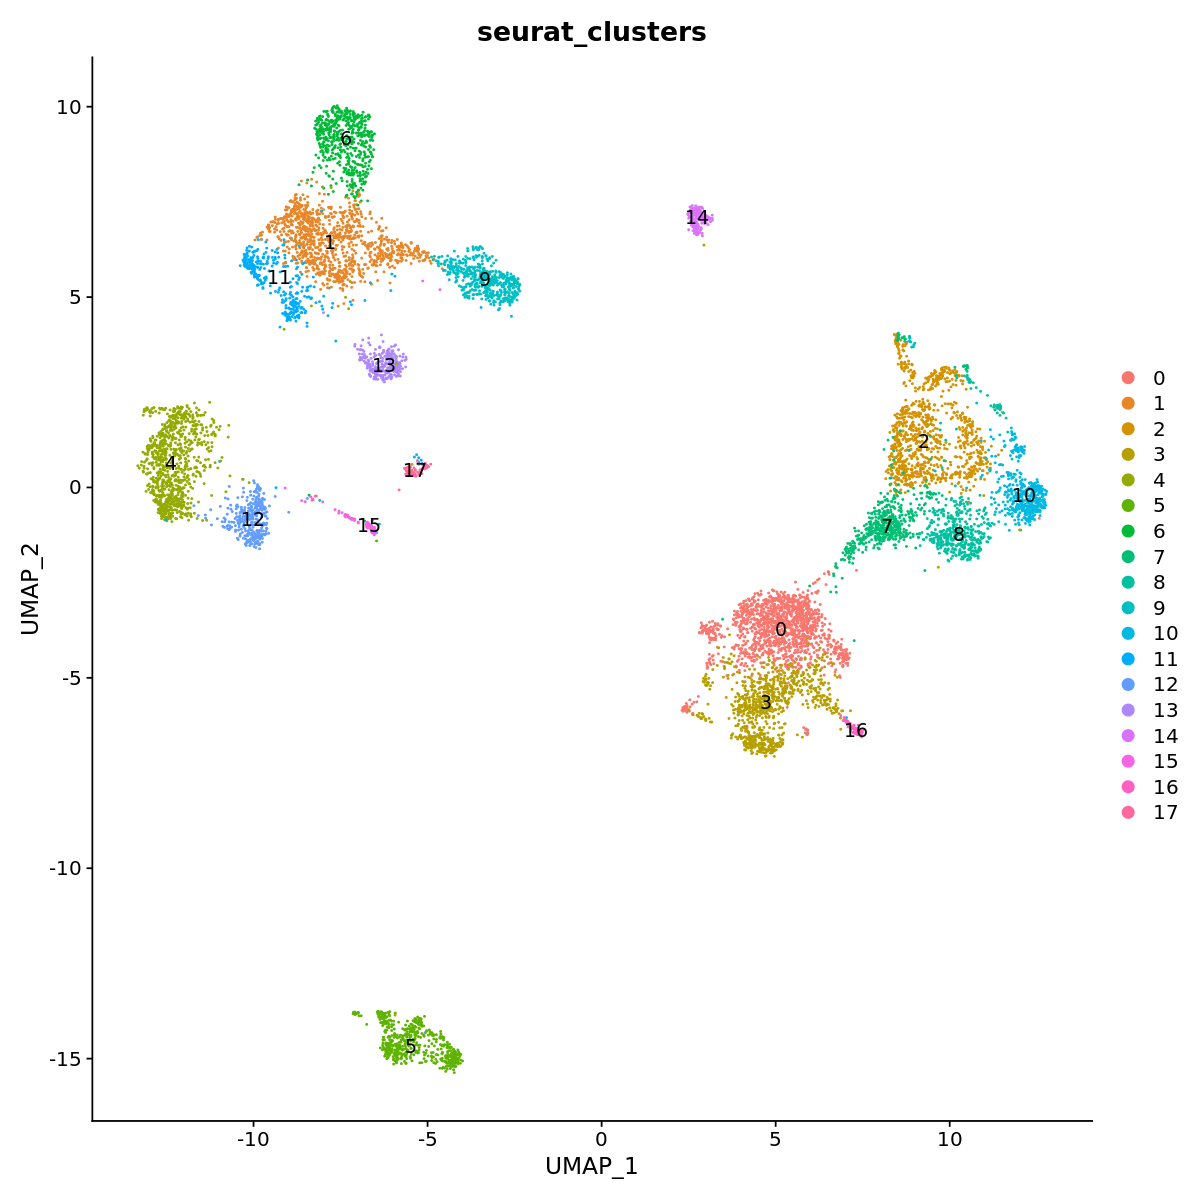

In [20]:
DimPlot(dme_obj, label = TRUE, group.by = 'seurat_clusters')

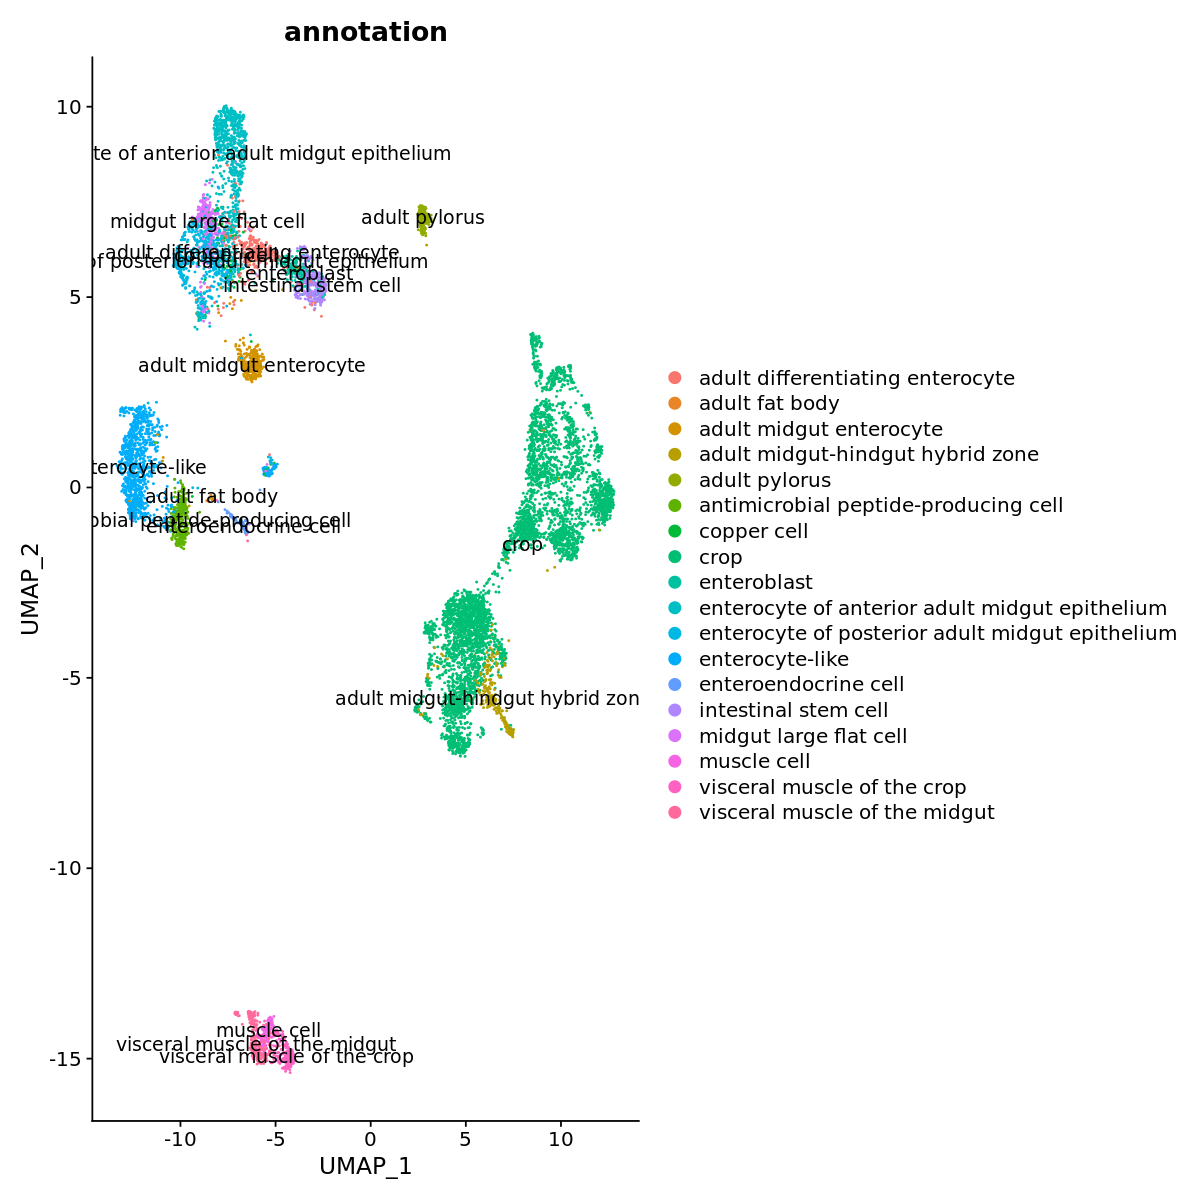

In [21]:
DimPlot(dme_obj, label = TRUE, group.by = 'annotation')

In [22]:
dme_obj_crop <- subset(dme_obj, idents = c('crop'))
dme_obj_crop <- FindNeighbors(dme_obj_crop)
dme_obj_crop <- FindClusters(dme_obj_crop, resolution=0.1)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4565
Number of edges: 160095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9575
Number of communities: 3
Elapsed time: 0 seconds


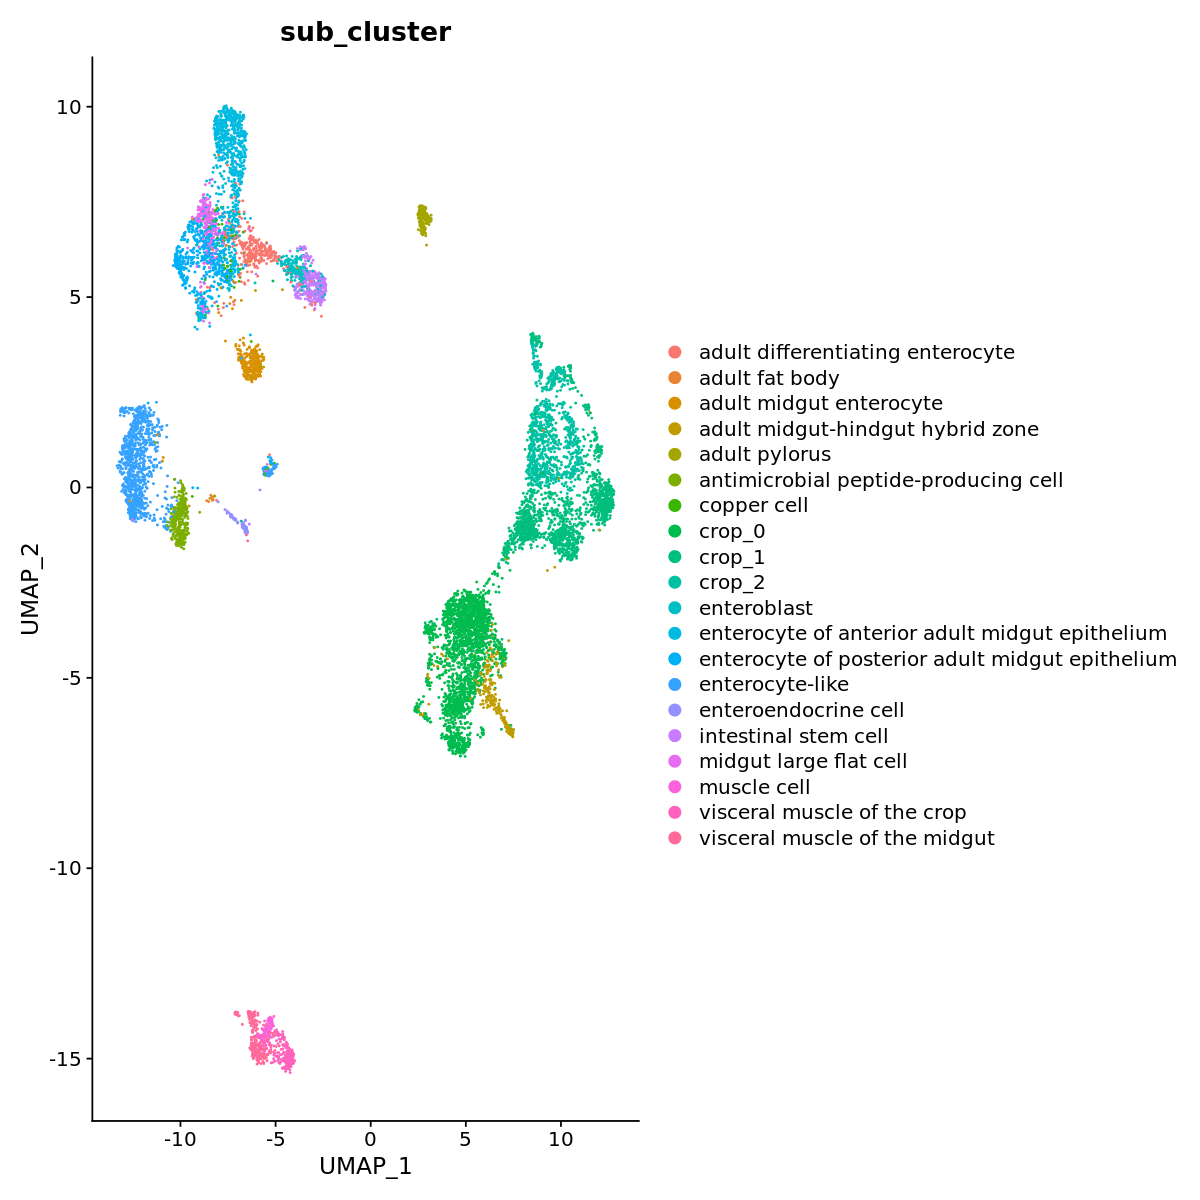

In [23]:
# Subclustering fly crop cell types
# Generate a new column called sub_cluster in the metadata
dme_obj$sub_cluster <- as.character(Idents(dme_obj))

# Change the information of cells containing sub-cluster information
dme_obj$sub_cluster[Cells(dme_obj_crop)] <- paste("crop_",Idents(dme_obj_crop), sep="")
DimPlot(dme_obj, group.by = "sub_cluster", )

In [5]:
## to compute cross-species correlation, we need to first average scaled counts of single cells of each cell type
## so for each cell type, we have a representative GO profile, which we then use to calculate correlation between species
## note that scGOclust provide a function thats called "getCellTypeGO" which is a wrapper of the seurat function used below
## examples of getCellTypeGO can be found in the kidney analysis notebook

In [24]:
mmu_scaled_avg = AverageExpression(
  mmu_obj,
  assays = 'RNA',
  features = NULL,
  return.seurat = FALSE,
  group.by = "sub_cluster",
  slot = "scale.data",
  verbose = TRUE,

)

In [25]:
dme_scaled_avg = AverageExpression(
  dme_obj,
  assays = 'RNA',
  features = NULL,
  return.seurat = FALSE,
  group.by = "sub_cluster",
  slot = "scale.data",
  verbose = TRUE,
)

In [26]:
options(repr.plot.width = 7, repr.plot.height = 7.5)

In [ ]:
# this is the key function to perform correlation analysis between species

In [27]:
seurat_cluster_corr = crossSpeciesCellTypeGOCorr(species_1 = 'mmusculus', 
                                                            species_2 = 'dmelanogaster', 
                                                            cell_type_go_sp1 = mmu_scaled_avg$RNA, 
                                                            cell_type_go_sp2 = dme_scaled_avg$RNA, 
                                                           corr_method = 'pearson')

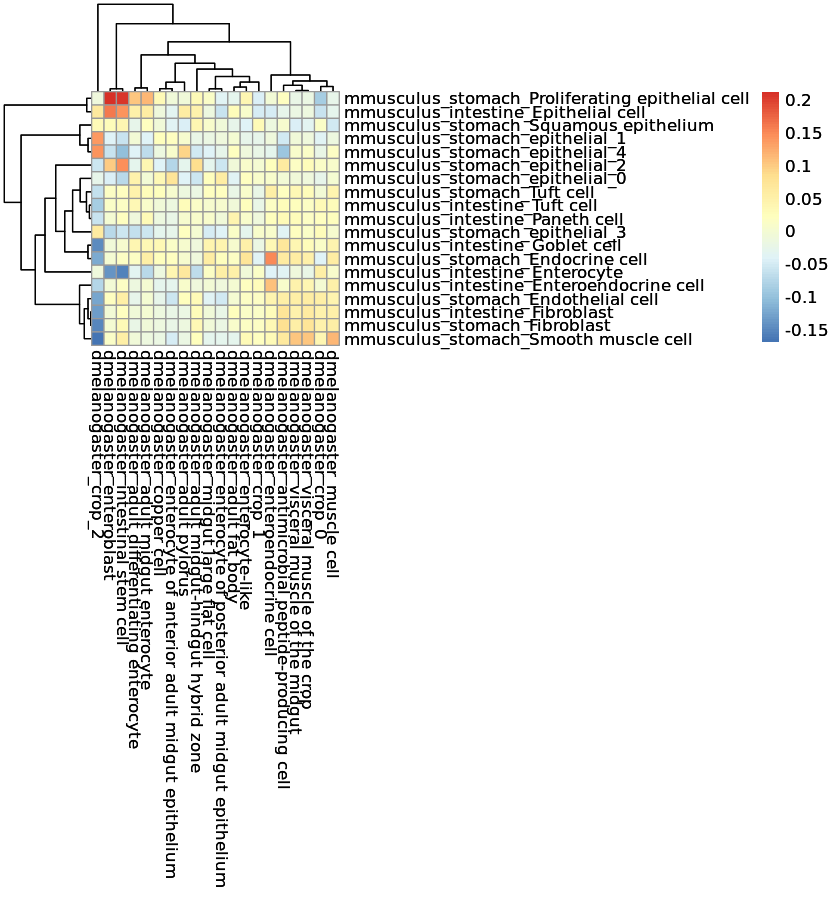

In [28]:
scGOclust::plotCellTypeCorrHeatmap(corr_matrix = seurat_cluster_corr)

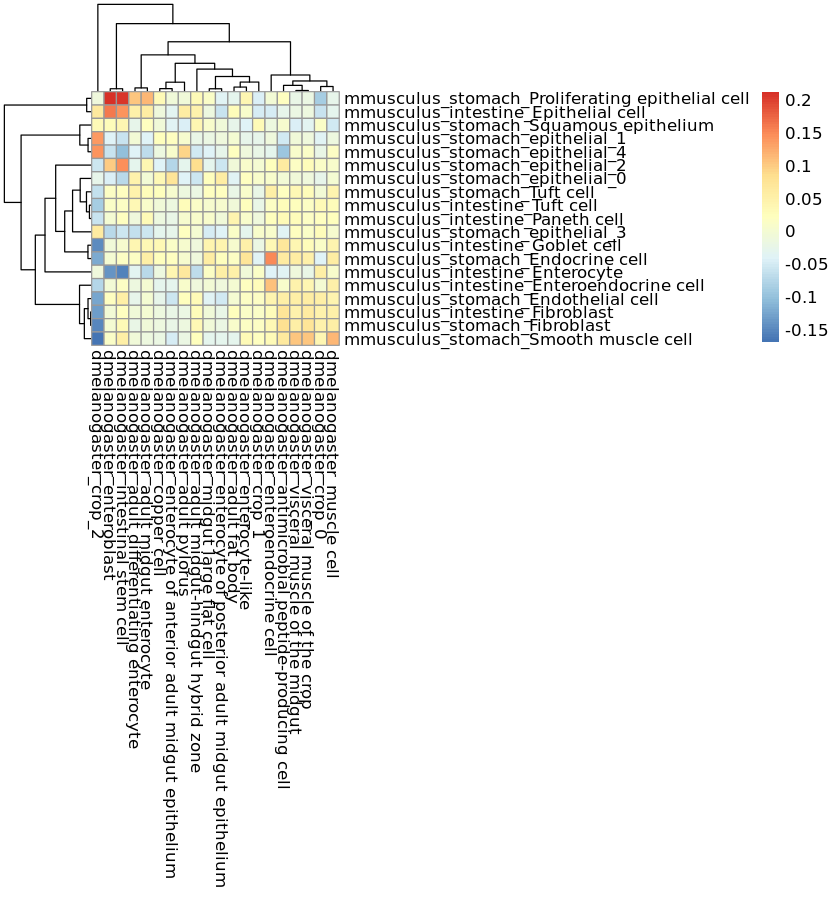

In [29]:
corr = scGOclust::plotCellTypeCorrHeatmap(corr_matrix = seurat_cluster_corr)

In [30]:
pdf("gut_corr_coarse_cluster_new_epi_only.pdf", width = 7, height = 7.5)
corr
dev.off()

png 
  2

In [ ]:
# now, after finding some interesting higly correlated cell type pairs cross-species, we proceed to calculate which GO terms are driving such correlations
# this is by calculating up-regulated GO terms per cell type, then get the shared up-regulated terms per cell type pair between species
# the calculation can take some time, so its also recommended to run it as a cluster job

In [31]:
shared_go = getCellTypeSharedGO(species_1 = 'mmusculus', species_2 = 'dmelanogaster', 
                    cell_type_col_sp1 = 'sub_cluster', 
                    cell_type_col_sp2 = 'sub_cluster',
                    analyzed_go_seurat_sp1 = mmu_obj, 
                    analyzed_go_seurat_sp2 = dme_obj,
                                slot_use = 'data'
                       )

calculate cell type marker for species mmusculus, this will take a while

Calculating cluster stomach_epithelial_0

Calculating cluster stomach_epithelial_2

Calculating cluster stomach_epithelial_1

Calculating cluster stomach_epithelial_3

Calculating cluster stomach_Squamous epithelium

Calculating cluster stomach_Proliferating epithelial cell

Calculating cluster stomach_Fibroblast

Calculating cluster stomach_Endocrine cell

Calculating cluster stomach_epithelial_4

Calculating cluster stomach_Smooth muscle cell

Calculating cluster stomach_Tuft cell

Calculating cluster stomach_Endothelial cell

Calculating cluster intestine_Paneth cell

Calculating cluster intestine_Epithelial cell

Calculating cluster intestine_Enterocyte

Calculating cluster intestine_Goblet cell

Calculating cluster intestine_Fibroblast

Calculating cluster intestine_Enteroendocrine cell

Calculating cluster intestine_Tuft cell

calculate cell type marker for species dmelanogaster, this will take a while

Cal

In [59]:
head(shared_go$shared_sig_markers)

gene                            p_val_sp1    avg_log2FC_sp1 pct.1_sp1
1 actin crosslink formation       7.240705e-61 0.4222337      0.469    
2 actin filament depolymerization 1.553650e-91 0.3563639      0.931    
3 actin filament polymerization   2.357330e-78 0.3718733      0.856    
4 actin filament-based movement   2.907722e-34 0.3563329      0.411    
5 adherens junction assembly      4.828952e-82 0.4876971      0.941    
6 basement membrane disassembly   0.000000e+00 0.5726659      0.308    
  pct.2_sp1 p_val_adj_sp1 cluster_sp1          marker_type_sp1
1 0.266     2.978102e-57  intestine_Enterocyte sig_up         
2 0.852     6.390161e-88  intestine_Enterocyte sig_up         
3 0.681     9.695697e-75  intestine_Enterocyte sig_up         
4 0.265     1.195946e-30  intestine_Enterocyte sig_up         
5 0.859     1.986148e-78  intestine_Enterocyte sig_up         
6 0.028     0.000000e+00  intestine_Enterocyte sig_up         
  pct_intersect_sp1 p_val_sp2    avg_log2FC_sp2 pct.1_sp2 pct.2_sp2
1 0.1458967         1.459657e-15 0.2858892      0.986     0.794    
2 0.1458967         5.984456e-39 0.5439242      0.944     0.561    
3 0.1458967         4.465324e-13 0.2569191      0.968     0.847    
4 0.1458967         8.308824e-82 0.7353388      0.986     0.794    
5 0.1458967         5.176792e-21 0.2976585      0.986     0.841    
6 0.1458967         2.392337e-45 0.6523667      0.951     0.526    
  p_val_adj_sp2 cluster_sp2                      marker_type_sp2
1 6.003569e-12  adult differentiating enterocyte sig_up         
2 2.461407e-35  adult differentiating enterocyte sig_up         
3 1.836588e-09  adult differentiating enterocyte sig_up         
4 3.417419e-78  adult differentiating enterocyte sig_up         
5 2.129215e-17  adult differentiating enterocyte sig_up         
6 9.839680e-42  adult differentiating enterocyte sig_up         
  pct_intersect_sp2 species_1 species_2    
1 0.1828571         mmusculus dmelanogaster
2 0.1828571         mmusculus dmelanogaster
3 0.1828571         mmusculus dmelanogaster
4 0.1828571         mmusculus dmelanogaster
5 0.1828571         mmusculus dmelanogaster
6 0.1828571         mmusculus dmelanogaster

In [49]:
shared_go$shared_sig_markers %>% write_csv("gut_shared_go_seurat_clusters_shared_markers.csv")

In [50]:
shared_go %>% saveRDS("markers_and_shared_sig_markers_gut.rds")

#### obtain the last common ancestor of shared GO terms using the tool ontologyIndex
#### scOntoMatch is a helper package for translating GO ids and GO names, because ontologyIndex uses GO ids but usually GO names are more comprehensible
#### this is to return GO terms with the highest possible granularity

In [10]:
library(scOntoMatch)
library(ontologyIndex)

In [54]:
ont = ontologyIndex::get_OBO('../go_ontology/go-basic.obo', propagate_relationships = c('is_a', 'part_of'), )

In [55]:
library(ontologyPlot)

In [56]:
shared_go_cluster = shared_go$shared_sig_markers

In [60]:
levels(factor(shared_go_cluster$cluster_sp1))

[1] "stomach_epithelial_0"                 
 [2] "stomach_epithelial_2"                 
 [3] "stomach_epithelial_1"                 
 [4] "stomach_epithelial_3"                 
 [5] "stomach_Squamous epithelium"          
 [6] "stomach_Proliferating epithelial cell"
 [7] "stomach_Fibroblast"                   
 [8] "stomach_Endocrine cell"               
 [9] "stomach_epithelial_4"                 
[10] "stomach_Smooth muscle cell"           
[11] "stomach_Tuft cell"                    
[12] "stomach_Endothelial cell"             
[13] "intestine_Paneth cell"                
[14] "intestine_Epithelial cell"            
[15] "intestine_Enterocyte"                 
[16] "intestine_Goblet cell"                
[17] "intestine_Fibroblast"                 
[18] "intestine_Enteroendocrine cell"       
[19] "intestine_Tuft cell"

In [62]:
# obtain top positively correlated cell types between species

top_corr = seurat_cluster_corr %>% 
mutate('cell_type_sp1' = rownames(.)) %>% 
pivot_longer(cols = -c("cell_type_sp1"), names_to = 'cell_type', values_to = 'corr_val') %>% 
filter(corr_val > 0) %>% 
arrange(desc(corr_val))

In [64]:
head(top_corr)

cell_type_sp1                                  
1 mmusculus_stomach_Proliferating epithelial cell
2 mmusculus_stomach_Proliferating epithelial cell
3 mmusculus_intestine_Epithelial cell            
4 mmusculus_stomach_Endocrine cell               
5 mmusculus_stomach_epithelial_2                 
6 mmusculus_intestine_Epithelial cell            
  cell_type                          corr_val 
1 dmelanogaster_enteroblast          0.2131760
2 dmelanogaster_intestinal stem cell 0.2079245
3 dmelanogaster_enteroblast          0.1626684
4 dmelanogaster_enteroendocrine cell 0.1503553
5 dmelanogaster_intestinal stem cell 0.1466747
6 dmelanogaster_intestinal stem cell 0.1437844

In [67]:
head(shared_go_cluster )

gene                            p_val_sp1    avg_log2FC_sp1 pct.1_sp1
1 actin crosslink formation       7.240705e-61 0.4222337      0.469    
2 actin filament depolymerization 1.553650e-91 0.3563639      0.931    
3 actin filament polymerization   2.357330e-78 0.3718733      0.856    
4 actin filament-based movement   2.907722e-34 0.3563329      0.411    
5 adherens junction assembly      4.828952e-82 0.4876971      0.941    
6 basement membrane disassembly   0.000000e+00 0.5726659      0.308    
  pct.2_sp1 p_val_adj_sp1 cluster_sp1          marker_type_sp1
1 0.266     2.978102e-57  intestine_Enterocyte sig_up         
2 0.852     6.390161e-88  intestine_Enterocyte sig_up         
3 0.681     9.695697e-75  intestine_Enterocyte sig_up         
4 0.265     1.195946e-30  intestine_Enterocyte sig_up         
5 0.859     1.986148e-78  intestine_Enterocyte sig_up         
6 0.028     0.000000e+00  intestine_Enterocyte sig_up         
  pct_intersect_sp1 p_val_sp2    avg_log2FC_sp2 pct.1_sp2 pct.2_sp2
1 0.1458967         1.459657e-15 0.2858892      0.986     0.794    
2 0.1458967         5.984456e-39 0.5439242      0.944     0.561    
3 0.1458967         4.465324e-13 0.2569191      0.968     0.847    
4 0.1458967         8.308824e-82 0.7353388      0.986     0.794    
5 0.1458967         5.176792e-21 0.2976585      0.986     0.841    
6 0.1458967         2.392337e-45 0.6523667      0.951     0.526    
  p_val_adj_sp2 cluster_sp2                      marker_type_sp2
1 6.003569e-12  adult differentiating enterocyte sig_up         
2 2.461407e-35  adult differentiating enterocyte sig_up         
3 1.836588e-09  adult differentiating enterocyte sig_up         
4 3.417419e-78  adult differentiating enterocyte sig_up         
5 2.129215e-17  adult differentiating enterocyte sig_up         
6 9.839680e-42  adult differentiating enterocyte sig_up         
  pct_intersect_sp2 species_1 species_2    
1 0.1828571         mmusculus dmelanogaster
2 0.1828571         mmusculus dmelanogaster
3 0.1828571         mmusculus dmelanogaster
4 0.1828571         mmusculus dmelanogaster
5 0.1828571         mmusculus dmelanogaster
6 0.1828571         mmusculus dmelanogaster

In [71]:
## for each pair of cell types between species that are top positively correlated, obtain the LCA of shared up-regulated GO terms
## this is done through a loop and get the "minimal_set" of all shared up-regulated GO terms
## which removes the parent term of the child term is present
## therefore its the highest granularity GO results

all = data.frame()

for(i in seq(1, nrow(top_corr))){
    
    cell_type_sp1 = gsub("mmusculus_", "", top_corr[i, 'cell_type_sp1'])
    cell_type_sp2 = gsub("dmelanogaster_", "", top_corr[i, 'cell_type'])


    fc_mt_go_list = shared_go_cluster %>% filter(cluster_sp1 == cell_type_sp1) %>% 
    filter(cluster_sp2 == cell_type_sp2) %>% 
    mutate(avg_logfc_both = (avg_log2FC_sp1 + avg_log2FC_sp2) / 2) %>% 
    arrange(desc(avg_logfc_both))

    
    go_terms = getOntologyId(ont = ont, onto_name = unique(fc_mt_go_list$gene))
    go_terms_minimal = minimal_set(ontology = ont, terms = names(go_terms))
    
    go_terms_minimal_name = getOntologyName(ont = ont, onto_id = go_terms_minimal)
    
    add = fc_mt_go_list %>% filter(gene %in% go_terms_minimal_name) %>% arrange(desc(avg_logfc_both)) %>% head(15)
    
    all = rbind(all, add)
    
    
}




In [72]:
head(all)

gene                                                       p_val_sp1    
1 positive regulation of DNA demethylation                    3.886682e-65
2 mitotic spindle assembly checkpoint signaling               0.000000e+00
3 snRNA pseudouridine synthesis                               3.762319e-35
4 mitotic spindle organization                               3.335972e-291
5 positive regulation of transcription by RNA polymerase III  1.447919e-68
6 DNA topological change                                     1.783375e-216
  avg_log2FC_sp1 pct.1_sp1 pct.2_sp1 p_val_adj_sp1
1 0.4722273      0.559     0.326      1.598592e-61
2 1.4228156      0.872     0.443      0.000000e+00
3 0.2715561      0.644     0.449      1.547442e-31
4 1.1870330      0.904     0.618     1.372085e-287
5 0.4544480      0.559     0.317      5.955289e-65
6 0.9567912      0.649     0.262     7.335020e-213
  cluster_sp1                           marker_type_sp1 pct_intersect_sp1
1 stomach_Proliferating epithelial cell sig_up          0.2824675        
2 stomach_Proliferating epithelial cell sig_up          0.2824675        
3 stomach_Proliferating epithelial cell sig_up          0.2824675        
4 stomach_Proliferating epithelial cell sig_up          0.2824675        
5 stomach_Proliferating epithelial cell sig_up          0.2824675        
6 stomach_Proliferating epithelial cell sig_up          0.2824675        
  p_val_sp2     avg_log2FC_sp2 pct.1_sp2 pct.2_sp2 p_val_adj_sp2 cluster_sp2
1 6.942351e-123 1.3839163      0.995     0.429     2.855389e-119 enteroblast
2  2.103863e-10 0.3327689      0.708     0.492      8.653190e-07 enteroblast
3 1.688806e-145 1.2473902      0.777     0.147     6.946060e-142 enteroblast
4  8.568392e-26 0.3079678      1.000     0.985      3.524180e-22 enteroblast
5  4.626861e-58 0.8977907      0.881     0.436      1.903028e-54 enteroblast
6  6.475533e-13 0.3475638      0.837     0.599      2.663387e-09 enteroblast
  marker_type_sp2 pct_intersect_sp2 species_1 species_2     avg_logfc_both
1 sig_up          0.1757576         mmusculus dmelanogaster 0.9280718     
2 sig_up          0.1757576         mmusculus dmelanogaster 0.8777922     
3 sig_up          0.1757576         mmusculus dmelanogaster 0.7594732     
4 sig_up          0.1757576         mmusculus dmelanogaster 0.7475004     
5 sig_up          0.1757576         mmusculus dmelanogaster 0.6761193     
6 sig_up          0.1757576         mmusculus dmelanogaster 0.6521775

In [74]:
all %>% write_csv("gut_top15_terms_onto_minimal.csv")

In [6]:
# here, I used PCA plot to show the distinction of GO BP profile in mouuse and fly, provided as Supp Figs

In [75]:
fig1 = PCAPlot(object = mmu_obj,   group.by = 'orig.ident') 


In [76]:
fig2 = PCAPlot(object = mmu_obj, dims = c(2,3)) 


In [77]:
fig3 = FeaturePlot(object = mmu_obj, features = c("cell differentiation"), reduction = 'pca', dims = c(2,3)) 
fig4 = FeaturePlot(object = mmu_obj, features = c("cell population proliferation"), reduction = 'pca', dims = c(2,3)) 

In [78]:
options(repr.plot.width = 20, repr.plot.height = 4.2)

In [79]:
library(cowplot)

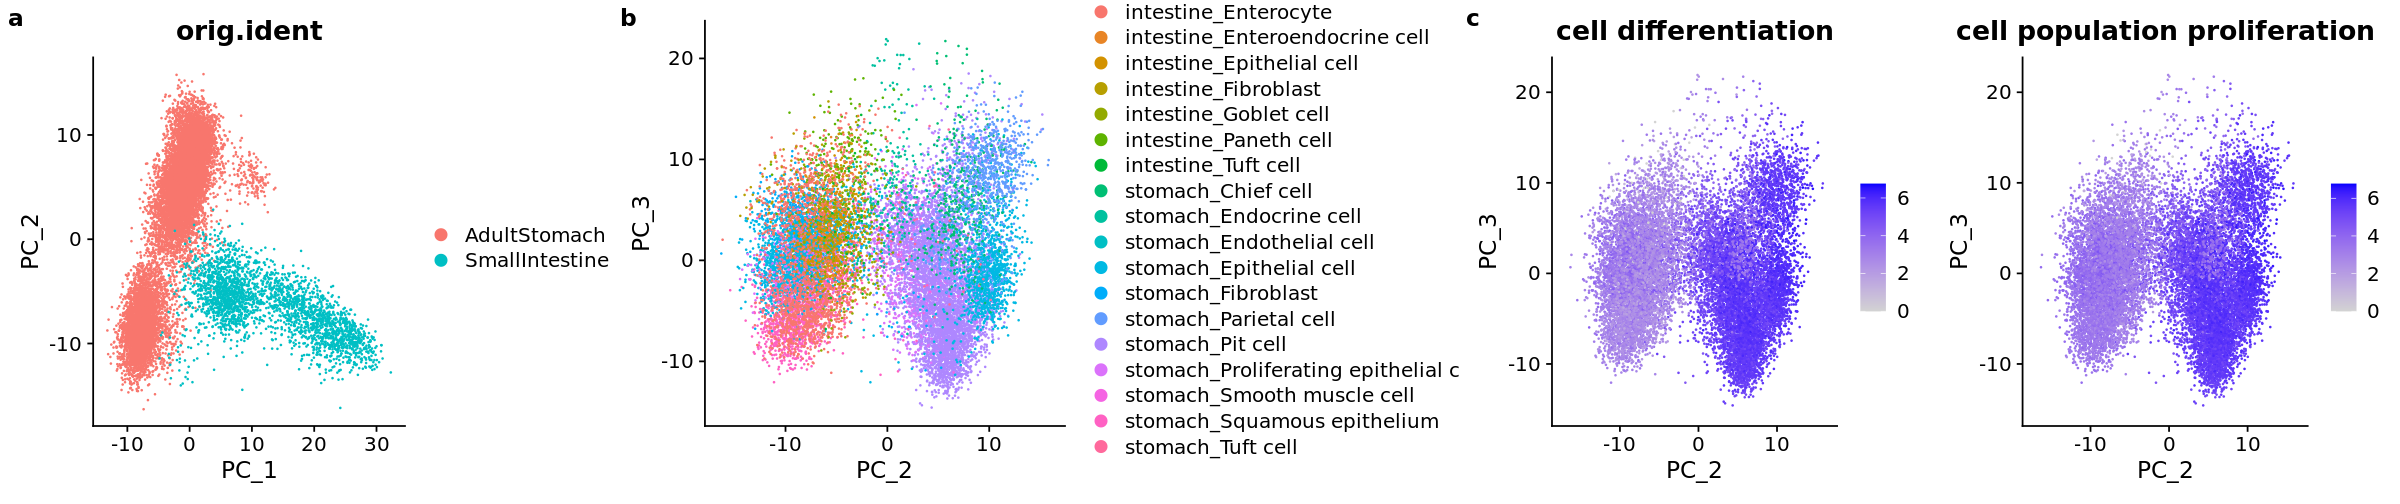

In [80]:
plot_grid(fig1, fig2, fig3, fig4, nrow = 1, axis = 'lb', align = 'hv', rel_widths = c(1.3, 1.8, 1, 1), labels = c("a", "b", "c"), label_size = 14) 

In [81]:
dfig1 = PCAPlot(object = dme_obj,   group.by = 'annotation')

In [82]:
dfig2 = FeaturePlot(object = dme_obj, features = c("intestinal epithelial cell development", 
                                                   'contractile actin filament bundle assembly', 
                                                   'skeletal muscle contraction'), reduction = 'pca', dims = c(1, 2), ncol = 3, combine=TRUE)

In [83]:
options(repr.plot.width = 21, repr.plot.height  = 4.2)

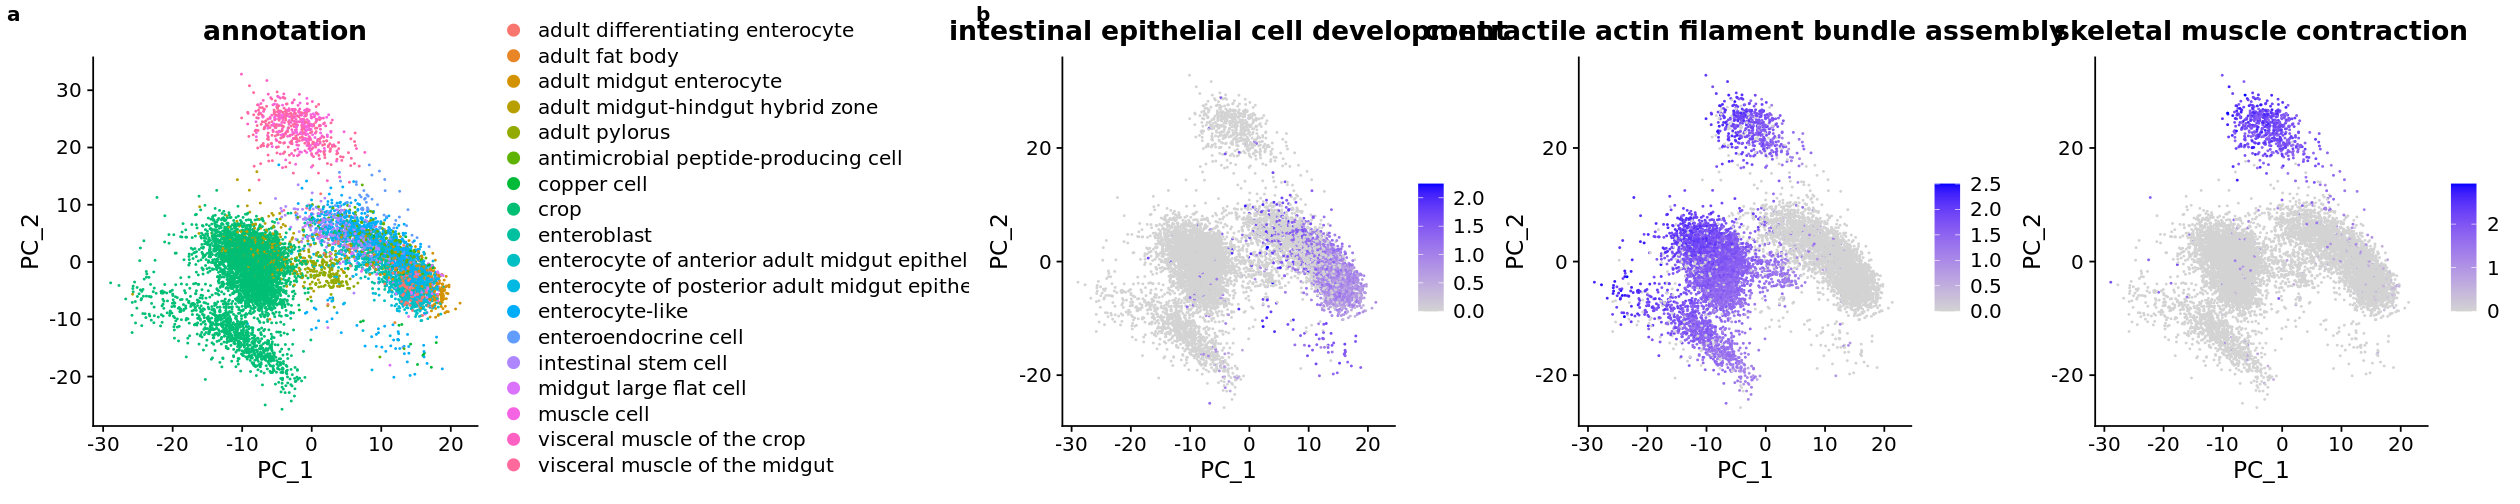

In [84]:
plot_grid(dfig1, dfig2, nrow = 1, axis = 'lb', align = 'hv', rel_widths = c(2.5, 4), labels = c("a", "b"), label_size = 12)


In [ ]:
# here, focusing on the crop_2 subpopulation, I plot the top up-regulated GO BP terms 

In [87]:
crop2_top_features = all %>% filter(cluster_sp2 == 'crop_2') %>% filter(cluster_sp1 == 'stomach_epithelial_1') %>% arrange(desc(avg_log2FC_sp2)) %>% 
pull(gene)

In [98]:
all %>% filter(cluster_sp2 == 'crop_2') %>% filter(cluster_sp1 == 'stomach_epithelial_1') 

gene                                                                                               
1  fatty acid biosynthetic process                                                                    
2  ribosomal large subunit assembly                                                                   
3  ribosomal small subunit assembly                                                                   
4  mitochondrial electron transport, cytochrome c to oxygen                                           
5  translation                                                                                        
6  electron transport coupled proton transport                                                        
7  mitochondrial electron transport, NADH to ubiquinone                                               
8  xenobiotic metabolic process                                                                       
9  proton motive force-driven mitochondrial ATP synthesis                                             
10 mitochondrial respiratory chain complex I assembly                                                 
11 endonucleolytic cleavage to generate mature 3'-end of SSU-rRNA from (SSU-rRNA, 5.8S rRNA, LSU-rRNA)
12 mitochondrial electron transport, ubiquinol to cytochrome c                                        
13 sphingolipid biosynthetic process                                                                  
14 removal of superoxide radicals                                                                     
15 chaperone-mediated protein complex assembly                                                        
   p_val_sp1     avg_log2FC_sp1 pct.1_sp1 pct.2_sp1 p_val_adj_sp1
1   0.000000e+00 2.0036765      0.944     0.579      0.000000e+00
2   0.000000e+00 0.8233821      1.000     0.995      0.000000e+00
3  6.908544e-191 0.3615835      0.999     0.997     2.841484e-187
4   0.000000e+00 0.9710689      1.000     0.993      0.000000e+00
5   0.000000e+00 0.4474199      1.000     1.000      0.000000e+00
6   0.000000e+00 1.0290696      1.000     0.994      0.000000e+00
7   0.000000e+00 0.8984921      1.000     0.998      0.000000e+00
8   0.000000e+00 0.9762767      0.992     0.955      0.000000e+00
9   0.000000e+00 0.5647012      1.000     1.000      0.000000e+00
10  0.000000e+00 0.6876384      1.000     1.000      0.000000e+00
11  4.389379e-49 0.2880177      0.836     0.710      1.805352e-45
12  0.000000e+00 0.4672531      1.000     0.998      0.000000e+00
13  2.714782e-64 0.3261095      0.878     0.800      1.116590e-60
14  4.092464e-89 0.2973622      0.938     0.898      1.683231e-85
15  0.000000e+00 0.9655253      0.950     0.794      0.000000e+00
   cluster_sp1          marker_type_sp1 pct_intersect_sp1 p_val_sp2    
1  stomach_epithelial_1 sig_up          0.26875            0.000000e+00
2  stomach_epithelial_1 sig_up          0.26875            0.000000e+00
3  stomach_epithelial_1 sig_up          0.26875            0.000000e+00
4  stomach_epithelial_1 sig_up          0.26875            0.000000e+00
5  stomach_epithelial_1 sig_up          0.26875            0.000000e+00
6  stomach_epithelial_1 sig_up          0.26875           5.491925e-154
7  stomach_epithelial_1 sig_up          0.26875           9.045340e-199
8  stomach_epithelial_1 sig_up          0.26875            9.194724e-88
9  stomach_epithelial_1 sig_up          0.26875           3.802695e-223
10 stomach_epithelial_1 sig_up          0.26875           1.132160e-158
11 stomach_epithelial_1 sig_up          0.26875           1.417894e-301
12 stomach_epithelial_1 sig_up          0.26875           1.643741e-175
13 stomach_epithelial_1 sig_up          0.26875           1.003871e-298
14 stomach_epithelial_1 sig_up          0.26875           4.173507e-170
15 stomach_epithelial_1 sig_up          0.26875            2.719347e-19
   avg_log2FC_sp2 pct.1_sp2 pct.2_sp2 p_val_adj_sp2 cluster_sp2 marker_type_sp2
1  1.2129008      0.999     0.900      0.000000e+00 crop_2      sig

In [89]:
dme_obj@meta.data  = dme_obj@meta.data %>% mutate(crop2_crop = ifelse(sub_cluster == 'crop_2', 'crop_2', ifelse(annotation == 'crop', 'crop_others', 'others')))

In [90]:
fig2 = DoHeatmap(object = dme_obj, features = crop2_top_features[1:15], group.by = 'crop2_crop', slot = 'data', size = 3.5, angle = 30) +
scale_fill_viridis()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [91]:
options(repr.plot.width = 12, repr.plot.height = 3)

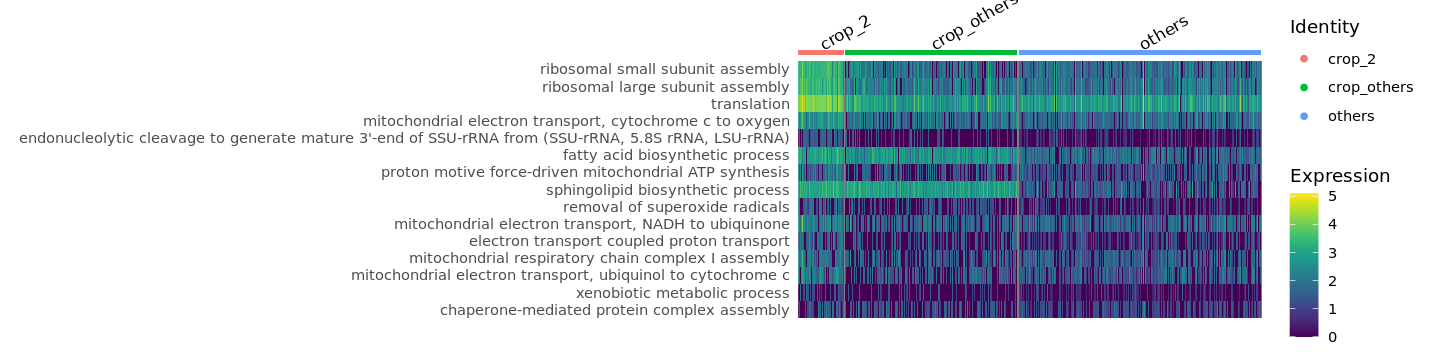

In [92]:
fig2

In [93]:
dme_obj@meta.data  = dme_obj@meta.data %>% mutate(crop_2 = ifelse(sub_cluster == 'crop_2', 'crop_2', 'others'))

In [94]:
options(repr.plot.width = 12, repr.plot.height = 4)

In [7]:
# This is to show the crop_2 subpopulation on the GO BP feature UMAP

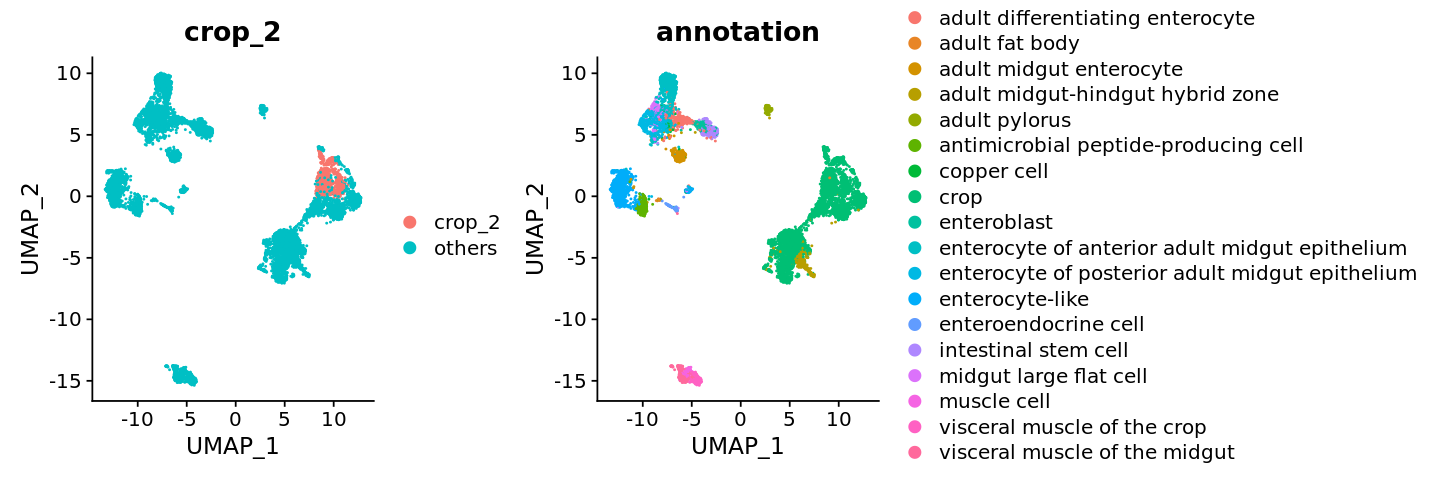

In [95]:
fig1 = DimPlot(object = dme_obj, group.by = c('crop_2', 'annotation'), repel = T,
        ncol = 2, label = F, 
       cols.highlight = c("blue", "red"))

fig1

In [11]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.9 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /nfs/research/icortes/ysong/anaconda3/envs/R4.3/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/London
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ontologyIndex_2.11    scOntoMatch_0.1.1     lubridate_1.9.2      
 [4] forcats_1.0.0         stringr_1.5.1         dplyr_1.1.4          
 [7] purrr_1.0.2           readr_2.1.4           tidyr_1